# Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [80]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Создайте датафреймы X и y из этих данных.

In [85]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])

X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


(None, None)

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [144]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [145]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

Постройте диаграмму рассеяния на этих данных.

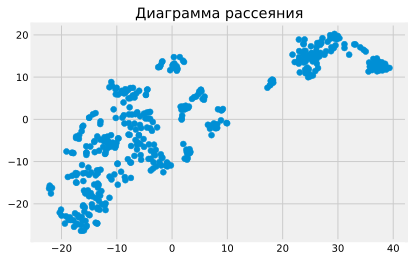

In [146]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.title('Диаграмма рассеяния')
plt.show()

# Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [147]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

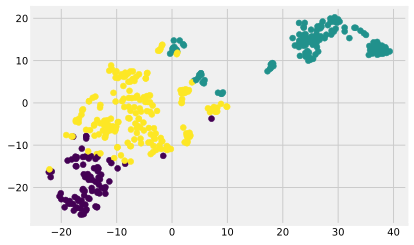

In [148]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [149]:
print('"price" кластер 0:', y_train[labels_train == 0].mean(),
      '\n"price" кластер 1:', y_train[labels_train == 1].mean(),
      '\n"price" кластер 2:', y_train[labels_train == 2].mean())

"price" кластер 0: 27.78837209302326 
"price" кластер 1: 16.165354330708663 
"price" кластер 2: 24.958115183246072


In [150]:
print('"CRIM" кластер 0:', X_train.loc[labels_train == 0, 'CRIM'].mean(),
      '\n"CRIM" кластер 1:', X_train.loc[labels_train == 1,'CRIM'].mean(),
      '\n"CRIM" кластер 2:', X_train.loc[labels_train == 2, 'CRIM'].mean())

"CRIM" кластер 0: 0.07356558139534886 
"CRIM" кластер 1: 10.797028425196853 
"CRIM" кластер 2: 0.42166020942408367


# *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

In [151]:
labels_test = kmeans.predict(X_test_scaled)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [152]:
print('"price" кластер 0:', y_test[labels_test == 0].mean(),
      '\n"price" кластер 1:', y_test[labels_test == 1].mean(),
      '\n"price" кластер 2:', y_test[labels_test == 2].mean())

"price" кластер 0: 31.35 
"price" кластер 1: 16.43714285714286 
"price" кластер 2: 21.860784313725492


In [153]:
print('"CRIM" кластер 0:', X_test.loc[labels_test == 0, 'CRIM'].mean(),
      '\n"CRIM" кластер 1:', X_test.loc[labels_test == 1,'CRIM'].mean(),
      '\n"CRIM" кластер 2:', X_test.loc[labels_test == 2, 'CRIM'].mean())

"CRIM" кластер 0: 0.062060000000000004 
"CRIM" кластер 1: 10.165531142857143 
"CRIM" кластер 2: 0.26607882352941176
